### practical 1

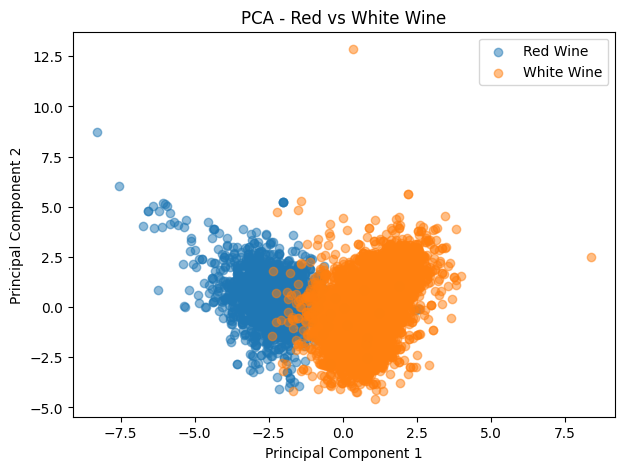

Explained variance by PC1: 25.36%
Explained variance by PC2: 22.08%
Total variance explained: 47.44%


In [28]:
# --- PCA on Wine Dataset (Red vs White) ---

# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.decomposition import PCA  # For Principal Component Analysis
from sklearn.preprocessing import StandardScaler  # For standardizing features

# Load dataset from CSV file
data = pd.read_csv(r"C:\Users\jaida\Downloads\Datasets\Datasets\winequality.csv")

# Encode wine type: red=0, white=1 (if 'type' column exists in the dataset)
# This converts categorical text data into numerical values for processing
if 'type' in data.columns:
    data['type'] = data['type'].map({'red': 0, 'white': 1})
else:
    # Warning message if the dataset doesn't contain wine type information
    print("⚠️ No 'type' column found — ensure dataset has red/white info.")

# Handle missing values by removing rows with any NaN values
# Alternative approach: data.fillna(data.mean(), inplace=True) would fill missing values with column means
data = data.dropna()

# Separate features (X) and target (y)
# X contains all the chemical properties, y contains the wine type (0=red, 1=white)
X = data.drop('type', axis=1)  # axis=1 means drop column (not row)
y = data['type']  # This is our target variable

# Standardize the features - crucial step for PCA
# PCA is sensitive to the scale of features, so we standardize to mean=0 and variance=1
X_scaled = StandardScaler().fit_transform(X)

# Apply Principal Component Analysis (PCA)
# n_components=2 means we reduce dimensions to 2 principal components for visualization
pca = PCA(n_components=2)
# Transform the scaled data into 2D space using the principal components
pca_result = pca.fit_transform(X_scaled)

# Create visualization to see how well PCA separates red vs white wines
plt.figure(figsize=(7,5))
# Plot red wines (y==0) - first component vs second component
plt.scatter(pca_result[y==0,0], pca_result[y==0,1], label='Red Wine', alpha=0.5)
# Plot white wines (y==1) - first component vs second component
plt.scatter(pca_result[y==1,0], pca_result[y==1,1], label='White Wine', alpha=0.5)
plt.xlabel('Principal Component 1')  # First principal component (most variance)
plt.ylabel('Principal Component 2')  # Second principal component (second most variance)
plt.title('PCA - Red vs White Wine')  # Chart title
plt.legend()  # Show legend to identify wine types
plt.show()  # Display the plot

# Optional: Print explained variance to see how much information is captured by each component
print(f"Explained variance by PC1: {pca.explained_variance_ratio_[0]:.2%}")
print(f"Explained variance by PC2: {pca.explained_variance_ratio_[1]:.2%}")
print(f"Total variance explained: {sum(pca.explained_variance_ratio_):.2%}")

### practical 2

In [29]:
# --- Ridge & Lasso Regression for Bike Rentals Prediction ---

# Import necessary libraries for data processing and machine learning
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing features to common scale
from sklearn.linear_model import Ridge, Lasso  # Import Ridge and Lasso regression models
from sklearn.metrics import mean_squared_error, r2_score  # For evaluating model performance

# Load the bike rental dataset from CSV file
data = pd.read_csv(r"C:\Users\jaida\Downloads\Datasets\Datasets\bike(hour).csv")

# Data preprocessing: 
# - select_dtypes(include='number') keeps only numerical columns (excludes text/date columns)
# - dropna() removes any rows with missing values to ensure clean data
data = data.select_dtypes(include='number').dropna()

# Define features (X) and target (y):
# - X contains all columns EXCEPT 'cnt' (count of bike rentals) - these are our predictors
# - y contains only the 'cnt' column - this is what we want to predict (bike rental count)
X = data.drop('cnt', axis=1)  # axis=1 means drop column (not row)
y = data['cnt']  # Target variable: number of bike rentals

# Split the data into training and testing sets:
# - X_train, y_train: data used to train the model (80% of total data)
# - X_test, y_test: data used to test the model (20% of total data)
# - random_state=42 ensures reproducible results (same split every time)
# - test_size=0.2 means 20% of data used for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features - CRUCIAL STEP for regularized regression:
# - StandardScaler transforms data to have mean=0 and standard deviation=1
# - fit_transform on training data: learns scaling parameters AND applies transformation
# - transform on test data: applies SAME scaling parameters (don't fit on test data!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Learn and apply scaling to training data
X_test = scaler.transform(X_test)        # Apply same scaling to test data

# --- RIDGE REGRESSION ---
# Ridge regression adds L2 penalty (sum of squared coefficients) to prevent overfitting
# - alpha=1.0: regularization strength (higher alpha = more regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)  # Train the Ridge model on training data
ridge_pred = ridge.predict(X_test)  # Make predictions on test data

# --- LASSO REGRESSION ---
# Lasso regression adds L1 penalty (sum of absolute coefficients) which can zero out some coefficients
# - alpha=0.1: regularization strength (smaller than Ridge since Lasso tends to need smaller alphas)
# - Lasso can perform feature selection by setting some coefficients to exactly zero
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)  # Train the Lasso model on training data
lasso_pred = lasso.predict(X_test)  # Make predictions on test data

# Evaluate and compare model performance:
# - RMSE (Root Mean Squared Error): measures average prediction error in same units as target
#   - squared=False returns RMSE instead of MSE
# - R² Score (R-squared): measures how well predictions approximate actual data (0-1 scale)
#   - 1 = perfect prediction, 0 = no better than mean prediction
print("Ridge Regression → RMSE:", mean_squared_error(y_test, ridge_pred, squared=False), " R²:", r2_score(y_test, ridge_pred))
print("Lasso Regression → RMSE:", mean_squared_error(y_test, lasso_pred, squared=False), " R²:", r2_score(y_test, lasso_pred))

# Optional: Compare which model performed better
# Lower RMSE and higher R² indicates better performance

Ridge Regression → RMSE: 0.013193281699425652  R²: 0.9999999945030659
Lasso Regression → RMSE: 0.11110062003648781  R²: 0.9999996101946177


C:\Users\jaida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\jaida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


### practical 3

In [30]:
# --- Wine Quality Prediction (Multiclass) ---

# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing
from sklearn.ensemble import RandomForestClassifier  # For the classification model
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation

# Load the wine quality dataset from CSV file
# This dataset contains chemical properties of wines and their quality ratings
data = pd.read_csv(r"C:\Users\jaida\Downloads\Datasets\Datasets\winequality.csv")

# Encode categorical columns to numerical values
# Some columns might contain text data (like 'red'/'white' for wine type)
# Machine learning models require numerical input, so we convert text to numbers
for col in data.select_dtypes(include='object').columns:
    # LabelEncoder converts categorical text labels into numerical codes
    # Example: ['red', 'white', 'red'] becomes [0, 1, 0]
    data[col] = LabelEncoder().fit_transform(data[col])

# Remove any rows with missing values
# Missing data can cause errors during model training
# inplace=True modifies the original DataFrame instead of returning a new one
data.dropna(inplace=True)

# Split the data into features (X) and target (y)
# X: All the chemical properties that we'll use to predict wine quality
# y: The wine quality score that we want to predict (this is our target variable)
X = data.drop('quality', axis=1)  # axis=1 means drop column (not row)
y = data['quality']  # This is what we're trying to predict

# Split the data into training and testing sets:
# - X_train, y_train: Used to train the model (80% of data)
# - X_test, y_test: Used to test the model's performance (20% of data)
# - random_state=42 ensures the same split every time for reproducible results
# - test_size=0.2 means 20% of data reserved for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges
# Different features have different scales (e.g., alcohol content vs pH level)
# StandardScaler transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Learn scaling parameters AND apply to training data
X_test = scaler.transform(X_test)        # Apply SAME scaling to test data (don't refit!)

# Initialize and train the Random Forest classifier
# Random Forest is an ensemble method that combines multiple decision trees
# - random_state=42 ensures reproducible results
# - It's good for multiclass classification and handles complex relationships well
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)  # Train the model using the training data

# Make predictions on the test set and evaluate model performance
y_pred = model.predict(X_test)  # Use trained model to predict wine quality on test data

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
# Accuracy: Percentage of correct predictions (correct predictions / total predictions)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
# Classification Report provides:
# - Precision: How many of the predicted positives were actually correct
# - Recall: How many of the actual positives were correctly identified  
# - F1-score: Harmonic mean of precision and recall
# - Support: Number of actual occurrences in each class

Accuracy: 0.6597061098221191

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.20      0.04      0.07        48
           5       0.71      0.70      0.70       430
           6       0.63      0.78      0.69       540
           7       0.69      0.53      0.60       228
           8       0.83      0.24      0.37        42
           9       0.00      0.00      0.00         1

    accuracy                           0.66      1293
   macro avg       0.44      0.33      0.35      1293
weighted avg       0.65      0.66      0.64      1293



C:\Users\jaida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jaida\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### practical 4

In [31]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.svm import SVC  # Support Vector Classifier for SVM implementation
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import accuracy_score, classification_report  # For model evaluation

# Load the breast cancer dataset from CSV file
# This dataset contains features from digitized images of breast mass biopsies
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\Breast_cancer.csv"
cancer_data = pd.read_csv(file_path)

# Print initial dataset information to understand its structure
print(f"Original dataset shape: {cancer_data.shape}")  # Shows (rows, columns)
print(f"Missing values: {cancer_data.isnull().sum().sum()}")  # Count total missing values

# Remove columns that are completely empty (all values are NaN)
# axis=1 means we're dropping columns (not rows)
# how='all' means only drop columns where ALL values are missing
cancer_data = cancer_data.dropna(axis=1, how='all')

print(f"After dropping empty column: {cancer_data.shape}")  # Show new dimensions after cleaning

# Prepare features (X) and target (y) for the machine learning model
# X: All the measurement features from the biopsy images (radius, texture, area, etc.)
# y: The diagnosis we want to predict (Malignant or Benign)
X = cancer_data.drop(['id', 'diagnosis'], axis=1)  # Remove ID (not predictive) and diagnosis (our target)
y = cancer_data['diagnosis'].map({'M': 1, 'B': 0})  # Convert text labels to numbers: M=1 (Malignant), B=0 (Benign)

# Remove any remaining rows that contain missing values in the features
# This ensures our training data is complete and won't cause errors
X = X.dropna()
y = y[X.index]  # Keep only the target values that correspond to the cleaned feature rows

print(f"Final features shape: {X.shape}")  # Final dimensions of our feature matrix
print(f"Final target shape: {y.shape}")    # Final dimensions of our target vector

# Split the data into training and testing sets:
# - Training set: Used to teach the model patterns in the data (80% of data)
# - Test set: Used to evaluate how well the model performs on unseen data (20% of data)
# - random_state=42 ensures the same split every time for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges - CRUCIAL FOR SVM!
# SVM is sensitive to feature scales, so we transform all features to have mean=0 and std=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters from training data AND apply transformation
X_test_scaled = scaler.transform(X_test)        # Apply the SAME scaling to test data (don't refit!)

# Initialize and train the Support Vector Machine (SVM) classifier
# - kernel='rbf': Uses Radial Basis Function kernel, good for non-linear decision boundaries
# - random_state=42: Ensures reproducible results
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Train the model on the scaled training data

# Use the trained model to make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)  # Predict diagnoses for the test cases

# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
print(f"\nSVM Model Accuracy: {accuracy:.4f}")  # Display accuracy as decimal (e.g., 0.9737 = 97.37%)

# Generate detailed classification report showing precision, recall, and F1-score for each class
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))
# Precision: How many of the predicted malignant/benign were actually correct
# Recall: How many of the actual malignant/benign were correctly identified
# F1-score: Harmonic mean of precision and recall

# Provide a simple breakdown of correct classifications for each tumor type
print(f"\nResults Summary:")
print(f"Benign tumors correctly classified: {(y_test[y_test==0] == y_pred[y_test==0]).sum()}/{(y_test==0).sum()}")
print(f"Malignant tumors correctly classified: {(y_test[y_test==1] == y_pred[y_test==1]).sum()}/{(y_test==1).sum()}")
# Shows: "Correctly classified / Total actual" for each tumor type

Original dataset shape: (569, 33)
Missing values: 569
After dropping empty column: (569, 32)
Final features shape: (569, 30)
Final target shape: (569,)

SVM Model Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        71
   Malignant       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


Results Summary:
Benign tumors correctly classified: 71/71
Malignant tumors correctly classified: 41/43


### practical 5

In [32]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.ensemble import RandomForestClassifier  # For the classification model
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # For model evaluation
from sklearn.impute import SimpleImputer  # For handling missing values

# Load the forest cover type dataset from CSV file
# This dataset contains cartographic variables to predict forest cover types
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\covtype.csv"
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_samples, number_of_features)

# Prepare features (X) and target (y) for the machine learning model
# X: All the cartographic variables (elevation, slope, soil type, etc.)
# y: The forest cover type we want to predict
X = data.iloc[:, :-1]  # Select all columns except the last one (all features)
y = data.iloc[:, -1]   # Select only the last column (target variable - forest cover type)

# Display the unique forest cover types in the dataset
print(f"Target classes: {sorted(y.unique())}")  # Shows different forest cover types (e.g., 1-7)

# Handle missing values in the features
# Check if there are any missing values in the feature matrix
if X.isnull().sum().sum() > 0:
    # If missing values exist, use SimpleImputer to fill them with median values
    # strategy='median' replaces missing values with the median of each column
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    # fit_transform: Learns median values from data and applies imputation
    # Convert back to DataFrame to preserve column names

# Split the data into training and testing sets:
# - Training set: Used to train the Random Forest model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges
# While Random Forest doesn't strictly require scaling, it can sometimes help
# StandardScaler transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters AND apply to training data
X_test_scaled = scaler.transform(X_test)        # Apply SAME scaling to test data (don't refit!)

# Initialize and train the Random Forest classifier
# Random Forest is an ensemble method that combines multiple decision trees
# - n_estimators=100: Create 100 decision trees in the forest
# - random_state=42: Ensures reproducible results
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Predict forest cover types for test data

# Evaluate the model's performance using multiple metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average precision across all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average recall across all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average F1-score across all classes

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified samples
print(f"Precision: {precision:.4f}")  # How reliable the positive predictions are
print(f"Recall:    {recall:.4f}")     # How well the model finds all positive samples
print(f"F1 Score:  {f1:.4f}")        # Balanced measure of precision and recall

# Analyze and display feature importance
# Random Forest provides importance scores showing which features most influence predictions
importances = pd.Series(model.feature_importances_, index=X.columns)
print(f"\nTop 5 important features:")
for feature, importance in importances.nlargest(5).items():
    print(f"  {feature}: {importance:.4f}")
    # Higher importance values indicate features that are more influential in predictions

Dataset shape: (581012, 55)
Target classes: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]

Model Performance:
Accuracy:  0.9551
Precision: 0.9552
Recall:    0.9551
F1 Score:  0.9549

Top 5 important features:
  Elevation: 0.2409
  Horizontal_Distance_To_Roadways: 0.1184
  Horizontal_Distance_To_Fire_Points: 0.1117
  Horizontal_Distance_To_Hydrology: 0.0610
  Vertical_Distance_To_Hydrology: 0.0575


### practical 6

Dataset shape: (440, 8)


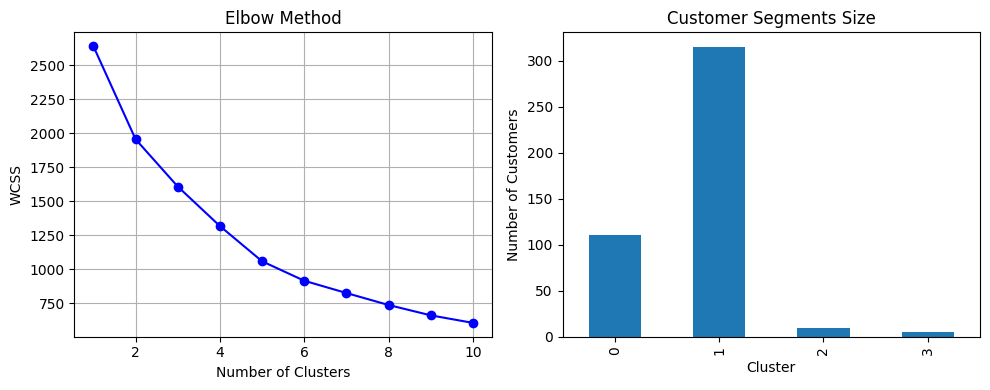


Optimal clusters: 4

Customers per segment:
Cluster
0    110
1    315
2     10
3      5
Name: count, dtype: int64

Segment profiles (average spending):
         Channel  Region     Fresh      Milk   Grocery    Frozen  \
Cluster                                                            
0           1.85    2.55   5591.44  10113.03  15637.39   1499.92   
1           1.12    2.54  13504.99   3044.54   3844.44   3271.43   
2           2.00    2.50  15964.90  34708.50  48536.90   3054.60   
3           1.20    2.80  50270.60  26361.80  16416.00  25122.80   

         Detergents_Paper  Delicassen  
Cluster                                
0                 6711.35     1759.09  
1                  852.32     1127.11  
2                24875.20     2942.80  
3                 2475.00    18595.20  


In [33]:
# Import necessary libraries for data analysis and visualization
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For creating visualizations and plots
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For standardizing features

# Load the wholesale customers dataset from CSV file
# This dataset contains purchasing behavior data of wholesale customers
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\Wholesale customers data.csv"
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_customers, number_of_features)

# Prepare features for clustering by removing non-purchasing behavior columns
# - 'Channel' and 'Region' are demographic info, not purchasing behavior
# - errors='ignore' prevents errors if these columns don't exist in the dataset
X = data.drop(['Channel', 'Region'], axis=1, errors='ignore')

# Scale the data to standardize feature ranges - CRUCIAL FOR K-MEANS!
# K-Means is distance-based, so features with larger ranges would dominate the clustering
# StandardScaler transforms data to have mean=0 and standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Learn scaling parameters AND apply transformation

# Find optimal number of clusters using the Elbow Method
# WCSS = Within-Cluster Sum of Squares (measures how compact clusters are)
wcss = []  # Initialize empty list to store WCSS values for each k
for k in range(1, 11):  # Test k values from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize K-Means
    kmeans.fit(X_scaled)  # Fit the model to the scaled data
    wcss.append(kmeans.inertia_)  # inertia_ gives the WCSS for the current k
    # Lower WCSS means tighter clusters, but we look for the "elbow" point

# Create visualization to help determine optimal number of clusters
plt.figure(figsize=(10, 4))  # Create a figure with specific dimensions

# Plot 1: Elbow Method visualization
plt.subplot(1, 2, 1)  # Create first subplot (1 row, 2 columns, position 1)
plt.plot(range(1, 11), wcss, 'bo-')  # Plot WCSS vs number of clusters with blue circles and lines
plt.xlabel('Number of Clusters')  # X-axis label
plt.ylabel('WCSS')  # Y-axis label (Within-Cluster Sum of Squares)
plt.title('Elbow Method')  # Plot title
plt.grid(True)  # Add grid lines for better readability

# Apply K-Means with the chosen optimal number of clusters
# Based on the elbow plot, we typically choose k where the curve starts to flatten
optimal_k = 4  # This is usually determined by looking at the elbow point in the plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)  # Initialize final K-Means
clusters = kmeans.fit_predict(X_scaled)  # Fit model AND predict cluster labels in one step

# Add the cluster assignments back to the original dataset
data['Cluster'] = clusters  # Create new column with cluster labels (0, 1, 2, 3)

# Plot 2: Customer segment sizes
plt.subplot(1, 2, 2)  # Create second subplot (1 row, 2 columns, position 2)
data['Cluster'].value_counts().sort_index().plot(kind='bar')  # Bar plot of customers per cluster
plt.title('Customer Segments Size')  # Plot title
plt.xlabel('Cluster')  # X-axis label
plt.ylabel('Number of Customers')  # Y-axis label

plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()  # Display the complete figure with both subplots

# Print results and analysis
print(f"\nOptimal clusters: {optimal_k}")  # Show the chosen number of clusters

print(f"\nCustomers per segment:")  # Display distribution of customers across segments
print(data['Cluster'].value_counts().sort_index())  # Count customers in each cluster

print(f"\nSegment profiles (average spending):")  # Analyze purchasing patterns per segment
segment_means = data.groupby('Cluster').mean()  # Calculate mean spending for each product category by cluster
print(segment_means.round(2))  # Round to 2 decimal places for readability

### practical 7

Dataset shape: (8068, 11)
Missing values: 1582
After removing missing values: (6665, 11)
Using features: ['ID', 'Age', 'Work_Experience']
Optimal clusters: 2 (score: 0.343)


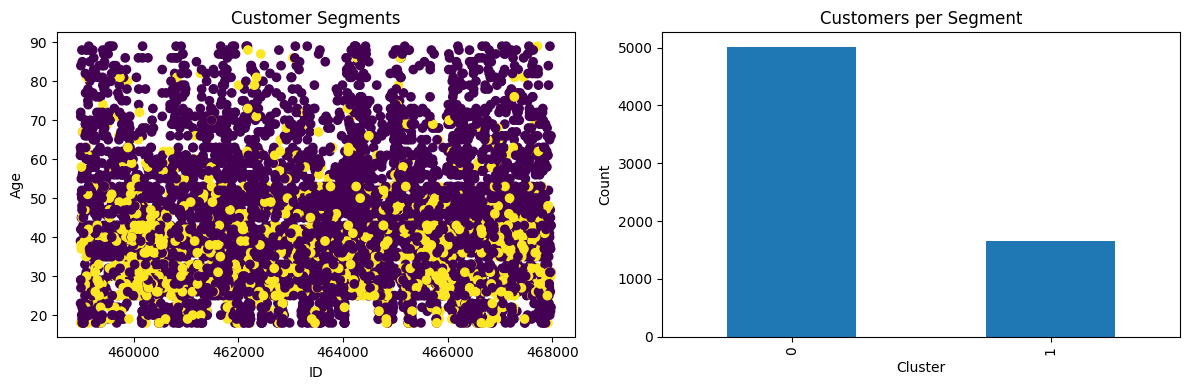


Segment sizes:
Cluster
0    5013
1    1652
Name: count, dtype: int64

Segment profiles:
               ID   Age  Work_Experience
Cluster                                 
0        463555.5  45.6              0.8
1        463411.5  37.2              8.0


In [34]:
# Import necessary libraries for data analysis and machine learning
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.cluster import KMeans  # For K-Means clustering algorithm
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import silhouette_score  # For evaluating clustering quality

# Load the customer segmentation dataset from CSV file
# This dataset contains demographic and behavioral data of customers
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\Customer_segmentation.csv"
data = pd.read_csv(file_path)

# Print initial dataset information to understand its structure
print(f"Dataset shape: {data.shape}")  # Shows (number_of_customers, number_of_features)
print(f"Missing values: {data.isnull().sum().sum()}")  # Count total missing values in dataset

# Handle missing values by removing rows with any NaN values
# This ensures clean data for clustering (K-Means cannot handle missing values)
data = data.dropna()

print(f"After removing missing values: {data.shape}")  # Show new dimensions after cleaning

# Use only numeric columns for clustering (K-Means requires numerical data)
# select_dtypes(include=[np.number]) filters only numerical columns
numeric_data = data.select_dtypes(include=[np.number])

# Check if we have enough numeric columns for meaningful clustering
if len(numeric_data.columns) < 2:
    print("Not enough numeric columns for clustering")  # Need at least 2 features for 2D visualization
else:
    # Select features for clustering - use first 3 numeric columns or all if less than 3
    # min(3, len(numeric_data.columns)) ensures we don't exceed available columns
    features = numeric_data.columns[:min(3, len(numeric_data.columns))]
    X = numeric_data[features]  # Create feature matrix with selected columns

    print(f"Using features: {features.tolist()}")  # Display which features are being used

    # Scale the data to standardize feature ranges - ESSENTIAL FOR K-MEANS
    # K-Means is distance-based, so features must be on comparable scales
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)  # Transform data to have mean=0 and std=1

    # Find optimal number of clusters using Silhouette Score
    # Silhouette Score measures how similar objects are to their own cluster vs other clusters
    # Range: -1 to 1 (higher is better)
    best_score = -1  # Initialize with worst possible score
    best_k = 2  # Start with minimum of 2 clusters

    # Test different numbers of clusters from 2 to 7
    for k in range(2, 8):
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Initialize K-Means
        clusters = kmeans.fit_predict(X_scaled)  # Fit model and predict cluster labels
        score = silhouette_score(X_scaled, clusters)  # Calculate silhouette score
        
        # Update best score and optimal k if current score is better
        if score > best_score:
            best_score = score
            best_k = k

    print(f"Optimal clusters: {best_k} (score: {best_score:.3f})")
    # Higher silhouette score indicates better-defined clusters

    # Apply final K-Means clustering with the optimal number of clusters
    kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
    data['Cluster'] = kmeans.fit_predict(X_scaled)  # Add cluster labels to original data

    # Create visualizations to understand the clustering results
    plt.figure(figsize=(12, 4))  # Create figure with width=12 inches, height=4 inches

    # Plot 1: Scatter plot of customer segments
    plt.subplot(1, 2, 1)  # First subplot in 1x2 grid
    if len(features) >= 2:
        # Create scatter plot using first two features, colored by cluster assignment
        plt.scatter(data[features[0]], data[features[1]], c=data['Cluster'], cmap='viridis')
        plt.xlabel(features[0])  # Label x-axis with first feature name
        plt.ylabel(features[1])  # Label y-axis with second feature name
        plt.title('Customer Segments')  # Plot title

    # Plot 2: Bar chart showing size of each customer segment
    plt.subplot(1, 2, 2)  # Second subplot in 1x2 grid
    data['Cluster'].value_counts().plot(kind='bar')  # Count customers in each cluster
    plt.title('Customers per Segment')  # Plot title
    plt.xlabel('Cluster')  # X-axis label
    plt.ylabel('Count')  # Y-axis label

    plt.tight_layout()  # Automatically adjust spacing between subplots
    plt.show()  # Display the complete figure

    # Print detailed results and analysis
    print(f"\nSegment sizes:")  # Show distribution of customers across segments
    print(data['Cluster'].value_counts().sort_index())  # Count per cluster, sorted by cluster number

    print(f"\nSegment profiles:")  # Analyze characteristics of each segment
    # Calculate mean values for each feature by cluster to understand segment profiles
    segment_profiles = data.groupby('Cluster')[features].mean().round(1)
    print(segment_profiles)  # Display average values for each segment

### practical 8

In [35]:
# Import necessary libraries for machine learning and data analysis
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and mathematical functions
from sklearn.ensemble import GradientBoostingRegressor  # For Gradient Boosting regression model
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing features
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation

# Load the Air Quality dataset from UCI repository
# This dataset contains air quality measurements from chemical sensors
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\AirQualityUCI.csv"
data = pd.read_csv(file_path)

# Print initial dataset dimensions to understand data size
print(f"Original dataset shape: {data.shape}")  # Shows (number_of_samples, number_of_features)

# Remove columns that are completely empty (all NaN values)
# axis=1 specifies we're dropping columns (not rows)
# how='all' means only drop columns where ALL values are missing
data = data.dropna(axis=1, how='all')

print(f"After removing empty columns: {data.shape}")  # Show cleaned dataset dimensions

# Identify the target column for prediction - Carbon Monoxide (CO) concentration
# Search for columns containing 'CO' in their name (case-insensitive)
co_columns = [col for col in data.columns if 'CO' in col.upper()]
# Use the first CO column found, or if none exist, use the last column as target
target_col = co_columns[0] if co_columns else data.columns[-1]

print(f"Target column: {target_col}")  # Display which column we're predicting

# Prepare features (X) and target (y) for the machine learning model
# X: All columns except the target column (these are our predictors)
# y: The target column we want to predict (CO concentration)
X = data.drop(target_col, axis=1)  # axis=1 means drop column (not row)
y = data[target_col]  # This is what we're trying to predict

# Remove non-numeric columns from features since Gradient Boosting requires numerical input
# select_dtypes(include=[np.number]) keeps only columns with numerical data types
X = X.select_dtypes(include=[np.number])

# Remove rows where the target variable (CO concentration) is missing
# ~y.isna() creates a boolean mask where True = non-missing target values
valid_indices = ~y.isna()
X = X[valid_indices]  # Keep only rows with valid target values
y = y[valid_indices]  # Keep only corresponding target values

# Fill any remaining missing values in features with median values
# Median is robust to outliers compared to mean
X = X.fillna(X.median())

print(f"Final dataset - Features: {X.shape[1]}, Samples: {X.shape[0]}")  # Final data dimensions

# Split the data into training and testing sets:
# - Training set: Used to train the model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features to standardize their ranges
# While Gradient Boosting is less sensitive to scaling than some algorithms,
# it can still improve performance and training speed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters AND apply to training data
X_test_scaled = scaler.transform(X_test)        # Apply SAME scaling to test data (don't refit!)

# Initialize and train the Gradient Boosting Regressor model
# Gradient Boosting builds an ensemble of weak prediction models (decision trees)
# - n_estimators=100: Create 100 decision trees in the ensemble
# - random_state=42: Ensures reproducible results
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Predict CO concentrations for test data

# Evaluate the model's performance using multiple regression metrics
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error: average squared difference
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error: average absolute difference
rmse = np.sqrt(mse)  # Root Mean Squared Error: square root of MSE (in original units)
r2 = r2_score(y_test, y_pred)  # R-squared: proportion of variance explained by model

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"R² Score: {r2:.4f}")   # Closer to 1.0 is better (1.0 = perfect prediction)
print(f"RMSE: {rmse:.4f}")     # In same units as target - lower is better
print(f"MAE: {mae:.4f}")       # In same units as target - lower is better
print(f"MSE: {mse:.4f}")       # Squared units - lower is better

# Analyze and display feature importance
# Gradient Boosting provides importance scores showing which features most influence predictions
importances = pd.Series(model.feature_importances_, index=X.columns)
print(f"\nTop 5 important features:")
for feature, importance in importances.nlargest(5).items():
    print(f"  {feature}: {importance:.4f}")
    # Higher importance values indicate features that are more influential in predicting CO levels

Original dataset shape: (9471, 17)
After removing empty columns: (9471, 15)
Target column: CO(GT)
Final dataset - Features: 12, Samples: 9357

Model Performance:
R² Score: 0.5882
RMSE: 49.3268
MAE: 26.4842
MSE: 2433.1305

Top 5 important features:
  NOx(GT): 0.7739
  T: 0.0382
  NO2(GT): 0.0346
  PT08.S1(CO): 0.0302
  PT08.S4(NO2): 0.0270


### practical 9

In [36]:
# xgboost_travel_classifier.py
# Short, simple pipeline: load CSV, preprocess, balance, train XGBoost, evaluate AUC-ROC & F1.
# Usage: python xgboost_travel_classifier.py

# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.compose import ColumnTransformer  # For applying different preprocessing to different columns
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import OneHotEncoder  # For converting categorical variables to numerical
from sklearn.pipeline import Pipeline  # For creating preprocessing pipelines
from sklearn.metrics import roc_auc_score, f1_score, classification_report  # For model evaluation
from xgboost import XGBClassifier  # For XGBoost classification algorithm
from imblearn.over_sampling import SMOTE  # For handling imbalanced datasets

# ---------------------------
# Configuration constants
CSV_PATH = r"C:\Users\jaida\Downloads\Datasets\Datasets\Travel.csv"  # Path to the dataset file
RANDOM_STATE = 42  # Seed for reproducible results
# ---------------------------

# 1. Load the dataset from CSV file
df = pd.read_csv(CSV_PATH)
print(f"Loaded {df.shape[0]} rows, {df.shape[1]} cols")  # Display dataset dimensions

# 2. Auto-detect a binary target column (prefer explicitly named common targets)
# This section automatically identifies which column is the target we want to predict
possible_names = ['decision','Decision','target','Target','Booked','booked','Purchased','purchased','Purchase','purchase','y','Y']
target_col = None
# First, check for common target column names
for name in possible_names:
    if name in df.columns:
        target_col = name
        break
# If no common names found, look for any column with exactly 2 unique values (binary classification)
if target_col is None:
    for c in df.columns:
        if df[c].nunique(dropna=True) == 2:
            target_col = c
            break
# Last resort: use the last column as target
if target_col is None:
    target_col = df.columns[-1]

print("Using target column:", target_col)  # Display which column is being used as target

# 3. Quick tidy: drop rows where target is null
# Remove rows with missing target values since we can't train on these
df = df[~df[target_col].isna()].copy()

# 4. Separate features (X) and target (y)
X = df.drop(columns=[target_col])  # All columns except target are features
# Convert target to integer (0/1) if it's not already numerical
y = df[target_col].astype(int) if pd.api.types.is_integer_dtype(df[target_col]) else pd.factorize(df[target_col])[0]

# 5. Identify numeric and categorical columns (keep only reasonable features)
# Separate columns by data type for different preprocessing strategies
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()  # Numerical columns
cat_cols = X.select_dtypes(include=['object','category','bool']).columns.tolist()  # Categorical columns

# If you specifically want to focus on certain columns (Age, Duration of Stay, Family Members, Package Type, Travel History),
# prefer them if present:
preferred = ['Age','Duration of Stay','Duration','Family Members','Family_Members','Package Type','Package','Travel History','Travel_History']
selected = []
# Check if preferred columns exist in the dataset
for p in preferred:
    if p in X.columns:
        selected.append(p)
# If preferred columns found, use only those features
if selected:
    numeric_cols = [c for c in numeric_cols if c in selected]
    cat_cols = [c for c in cat_cols if c in selected]
    X = X[numeric_cols + cat_cols]  # Filter features to only preferred columns

print("Numerical cols:", numeric_cols)  # Display numerical columns being used
print("Categorical cols:", cat_cols)    # Display categorical columns being used

# 6. Split data into training and testing sets
# stratify=y ensures same class distribution in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=RANDOM_STATE)

# 7. Create preprocessing pipelines for different data types
# Numerical pipeline: handle missing values with median imputation
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))  # Fill missing values with median
])

# Categorical pipeline: handle missing values and convert to numerical
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with most frequent value
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # Convert categories to numbers
])

# Combine numerical and categorical pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipe, numeric_cols),  # Apply num_pipe to numerical columns
    ('cat', cat_pipe, cat_cols)       # Apply cat_pipe to categorical columns
], remainder='drop')  # Drop any columns not specified above

# 8. Fit preprocessor and apply SMOTE on transformed training data
X_train_t = preprocessor.fit_transform(X_train)  # Learn preprocessing from training data and transform it
X_test_t = preprocessor.transform(X_test)        # Apply same preprocessing to test data

# Balance classes using SMOTE (Synthetic Minority Over-sampling Technique)
# Creates synthetic samples of minority class to handle class imbalance
sm = SMOTE(random_state=RANDOM_STATE)
X_res, y_res = sm.fit_resample(X_train_t, y_train)  # Create balanced training dataset

# 9. Train XGBoost classifier
# XGBoost is a powerful gradient boosting algorithm
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=RANDOM_STATE)
model.fit(X_res, y_res)  # Train the model on balanced, preprocessed data

# 10. Make predictions and evaluate model performance
y_proba = model.predict_proba(X_test_t)[:, 1]  # Get probability predictions for positive class
y_pred = model.predict(X_test_t)  # Get class predictions (0 or 1)

# Calculate evaluation metrics
auc = roc_auc_score(y_test, y_proba)  # Area Under ROC Curve - measures overall performance
f1 = f1_score(y_test, y_pred)         # F1 Score - balance between precision and recall

print(f"AUC-ROC: {auc:.4f}")  # Display AUC score (closer to 1.0 is better)
print(f"F1 Score: {f1:.4f}")  # Display F1 score (closer to 1.0 is better)
print("\nClassification Report:\n", classification_report(y_test, y_pred, digits=4))
# Classification report shows precision, recall, f1-score for each class

Loaded 4888 rows, 20 cols
Using target column: ProdTaken
Numerical cols: ['Age']
Categorical cols: []
AUC-ROC: 0.6103
F1 Score: 0.3310

Classification Report:
               precision    recall  f1-score   support

           0     0.8486    0.6285    0.7221       794
           1     0.2436    0.5163    0.3310       184

    accuracy                         0.6074       978
   macro avg     0.5461    0.5724    0.5266       978
weighted avg     0.7348    0.6074    0.6486       978



C:\Users\jaida\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:05:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### practical 9

In [37]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree classification algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For model evaluation

# Load the online shoppers intention dataset from CSV file
# This dataset contains browsing behavior and session information of website visitors
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\online_shoppers_intention.csv"
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_visitors, number_of_features)

# Handle categorical columns using one-hot encoding
# pd.get_dummies() converts categorical text columns into multiple binary (0/1) columns
# drop_first=True removes the first category to avoid multicollinearity
data = pd.get_dummies(data, drop_first=True)

# Prepare features (X) and target (y) for the machine learning model
# X: All the browsing and session features that might predict purchase behavior
# y: The Revenue column indicating whether a purchase was made (True/False)
X = data.drop('Revenue', axis=1)  # axis=1 means drop column (not row)
y = data['Revenue']  # This is what we're trying to predict - purchase decision

# Split the data into training and testing sets:
# - Training set: Used to train the Decision Tree model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree classifier
# Decision Tree creates a tree-like model of decisions and their possible consequences
# - random_state=42: Ensures reproducible results
# - max_depth=5: Limits tree depth to prevent overfitting (5 levels deep)
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)  # Train the model using the training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)  # Predict whether visitors will make purchases

# Evaluate the model's performance using multiple classification metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred)  # Quality of positive predictions: True Positives / (True Positives + False Positives)
recall = recall_score(y_test, y_pred)  # Ability to find all positive cases: True Positives / (True Positives + False Negatives)
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall: 2 * (precision * recall) / (precision + recall)

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified visitors
print(f"Precision: {precision:.4f}")  # When model predicts purchase, how often is it correct?
print(f"Recall:    {recall:.4f}")     # What percentage of actual purchasers did we identify?
print(f"F1 Score:  {f1:.4f}")        # Balanced measure of precision and recall

# Generate and analyze the confusion matrix
# Confusion matrix shows the breakdown of correct and incorrect predictions
cm = confusion_matrix(y_test, y_pred)  # Creates a 2x2 matrix of prediction vs actual
print(f"\nConfusion Matrix:")
print(f"True Negatives:  {cm[0,0]}")  # Correctly predicted no purchase (visitors who didn't buy)
print(f"False Positives: {cm[0,1]}")  # Incorrectly predicted purchase (said would buy but didn't)
print(f"False Negatives: {cm[1,0]}")  # Incorrectly predicted no purchase (missed actual buyers)
print(f"True Positives:  {cm[1,1]}")  # Correctly predicted purchase (identified actual buyers)

Dataset shape: (12330, 18)

Model Performance:
Accuracy:  0.8885
Precision: 0.7500
Recall:    0.4964
F1 Score:  0.5974

Confusion Matrix:
True Negatives:  1987
False Positives: 68
False Negatives: 207
True Positives:  204


### practical 10

In [38]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.naive_bayes import GaussianNB  # For Gaussian Naive Bayes classification algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # For model evaluation

# Load the famous Iris flower dataset from CSV file
# This dataset contains measurements of iris flowers from three different species
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\Iris.csv"
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_flowers, number_of_features)

# Prepare features (X) and target (y) for the machine learning model
# X: The four flower measurements (sepal length, sepal width, petal length, petal width)
# y: The species of iris flower we want to predict
X = data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # Select specific feature columns
y = data['Species']  # This is what we're trying to predict - iris species

# Display the unique species in the dataset to understand the classification task
print(f"Species: {y.unique()}")  # Shows the three iris species: Setosa, Versicolor, Virginica

# Split the data into training and testing sets:
# - Training set: Used to train the Naive Bayes model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
# Naive Bayes is based on Bayes' theorem and assumes feature independence
# GaussianNB assumes features follow normal (Gaussian) distribution
model = GaussianNB()
model.fit(X_train, y_train)  # Train the model using the training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)  # Predict iris species for the test flowers

# Evaluate the model's performance using multiple classification metrics
# For multiclass classification, we use 'weighted' average to handle multiple classes
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred, average='weighted')  # Weighted average precision across all classes
recall = recall_score(y_test, y_pred, average='weighted')  # Weighted average recall across all classes
f1 = f1_score(y_test, y_pred, average='weighted')  # Weighted average F1-score across all classes

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified flowers
print(f"Precision: {precision:.4f}")  # When model predicts a species, how often is it correct?
print(f"Recall:    {recall:.4f}")     # What percentage of each species did we correctly identify?
print(f"F1 Score:  {f1:.4f}")        # Balanced measure of precision and recall

# Generate and display the confusion matrix
# Confusion matrix shows how many flowers of each species were correctly/incorrectly classified
print(f"\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Rows represent actual species, columns represent predicted species
# Diagonal values show correct classifications, off-diagonal show misclassifications

# Generate detailed classification report
# Provides precision, recall, and F1-score for each individual species
print(f"\nClassification Report:")
print(classification_report(y_test, y_pred))
# Shows metrics for each class (Setosa, Versicolor, Virginica) plus averages

# Create a comparison table of actual vs predicted values
# This helps visualize specific prediction examples
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(f"\nSample predictions:")
print(results.head(10))  # Show first 10 predictions to see how well the model performed

Dataset shape: (150, 6)
Species: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']

Model Performance:
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Sample predictions:
              Actual        Predicted
73   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
118   Iris-virginica   Iris-virginica
78   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor
31       Iris-setosa      Iris-setosa
64   Iris-versicolor  Iris-versicolor
141   Iris-virgin

### practical 11

In [39]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.tree import DecisionTreeClassifier  # For Decision Tree classification algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For model evaluation

# Load the online shoppers intention dataset from CSV file
# This dataset contains browsing behavior and session information of website visitors
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\online_shoppers_intention.csv"
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_visitors, number_of_features)

# Handle categorical columns using one-hot encoding
# pd.get_dummies() converts categorical text columns into multiple binary (0/1) columns
# drop_first=True removes the first category to avoid multicollinearity (dummy variable trap)
data = pd.get_dummies(data, drop_first=True)

# Prepare features (X) and target (y) for the machine learning model
# X: All the browsing and session features that might predict purchase behavior
# y: The Revenue column indicating whether a purchase was made (True/False)
X = data.drop('Revenue', axis=1)  # axis=1 means drop column (not row) - keep all except Revenue
y = data['Revenue']  # This is what we're trying to predict - purchase decision

# Calculate and display the purchase rate to understand class distribution
# This helps identify if we're dealing with imbalanced data
print(f"Purchase rate: {y.mean():.2%}")  # Shows percentage of visitors who made purchases

# Split the data into training and testing sets:
# - Training set: Used to train the Decision Tree model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
# - stratify=y ensures same class distribution in both train and test sets (important for imbalanced data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Decision Tree classifier
# Decision Tree creates a tree-like model of decisions and their possible consequences
# - random_state=42: Ensures reproducible results
# - max_depth=5: Limits tree depth to prevent overfitting (5 levels deep)
model = DecisionTreeClassifier(random_state=42, max_depth=5)
model.fit(X_train, y_train)  # Train the model using the training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test)  # Predict whether visitors will make purchases (True/False)

# Evaluate the model's performance using multiple classification metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred)  # Quality of positive predictions: True Positives / (True Positives + False Positives)
recall = recall_score(y_test, y_pred)  # Ability to find all positive cases: True Positives / (True Positives + False Negatives)
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall: 2 * (precision * recall) / (precision + recall)

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified visitors
print(f"Precision: {precision:.4f}")  # When model predicts purchase, how often is it correct?
print(f"Recall:    {recall:.4f}")     # What percentage of actual purchasers did we identify?
print(f"F1 Score:  {f1:.4f}")        # Balanced measure of precision and recall

# Generate and analyze the confusion matrix
# Confusion matrix shows the breakdown of correct and incorrect predictions in a 2x2 matrix
cm = confusion_matrix(y_test, y_pred)  # Creates a 2x2 matrix: [[TN, FP], [FN, TP]]
print(f"\nConfusion Matrix:")
print(cm)  # Display the raw confusion matrix
print(f"\nTrue Negatives:  {cm[0,0]}")  # Correctly predicted no purchase (visitors who didn't buy)
print(f"False Positives: {cm[0,1]}")  # Incorrectly predicted purchase (said would buy but didn't) - Type I error
print(f"False Negatives: {cm[1,0]}")  # Incorrectly predicted no purchase (missed actual buyers) - Type II error
print(f"True Positives:  {cm[1,1]}")  # Correctly predicted purchase (identified actual buyers)

Dataset shape: (12330, 18)
Purchase rate: 15.47%

Model Performance:
Accuracy:  0.8994
Precision: 0.7107
Recall:    0.5916
F1 Score:  0.6457

Confusion Matrix:
[[1992   92]
 [ 156  226]]

True Negatives:  1992
False Positives: 92
False Negatives: 156
True Positives:  226


### practical 12

In [40]:
# Import necessary libraries for machine learning workflow
import pandas as pd  # For data manipulation and analysis
from sklearn.neighbors import KNeighborsClassifier  # For K-Nearest Neighbors classification algorithm
from sklearn.model_selection import train_test_split  # For splitting data into training and test sets
from sklearn.preprocessing import StandardScaler  # For standardizing features (CRITICAL for KNN)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # For model evaluation

# Load the breast cancer diagnostic dataset from CSV file
# This dataset contains features computed from digitized images of breast mass biopsies
file_path = r"C:\Users\jaida\Downloads\Datasets\Datasets\Breast_cancer.csv"
data = pd.read_csv(file_path)

# Print the dataset dimensions to understand its size
print(f"Dataset shape: {data.shape}")  # Shows (number_of_patients, number_of_features)

# Remove columns that are completely empty (all NaN values)
# axis=1 specifies we're dropping columns (not rows)
# how='all' means only drop columns where ALL values are missing
data = data.dropna(axis=1, how='all')

# Prepare features (X) and target (y) for the machine learning model
# X: All the diagnostic measurements from biopsy images (radius, texture, perimeter, area, etc.)
# y: The diagnosis we want to predict (Malignant or Benign)
X = data.drop(['id', 'diagnosis'], axis=1)  # Remove ID (not predictive) and diagnosis (our target)
y = data['diagnosis'].map({'M': 1, 'B': 0})  # Convert text labels to numbers: M=1 (Malignant), B=0 (Benign)

# Display the distribution of target classes to understand data balance
print(f"Target distribution: {y.value_counts()}")  # Shows count of malignant vs benign cases

# Split the data into training and testing sets:
# - Training set: Used to train the KNN model (80% of data)
# - Test set: Used to evaluate model performance on unseen data (20% of data)
# - random_state=42 ensures reproducible results (same split every time)
# - stratify=y ensures same proportion of malignant/benign cases in both sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features to standardize their ranges - EXTREMELY IMPORTANT FOR KNN!
# KNN is distance-based, so features with larger ranges would dominate the distance calculations
# Without scaling, features like "area" (large numbers) would overshadow "smoothness" (small numbers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Learn scaling parameters from training data AND apply transformation
X_test_scaled = scaler.transform(X_test)        # Apply the SAME scaling to test data (don't refit!)

# Initialize and train the K-Nearest Neighbors (KNN) classifier
# KNN works by finding the 'k' most similar training examples to a new case
# - n_neighbors=5: Use 5 nearest neighbors to make predictions
# - More neighbors = smoother decision boundaries, fewer neighbors = more complex boundaries
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data

# Use the trained model to make predictions on the test set
y_pred = model.predict(X_test_scaled)  # Predict diagnoses (malignant/benign) for test patients

# Evaluate the model's performance using multiple classification metrics
accuracy = accuracy_score(y_test, y_pred)  # Overall correctness: (correct predictions) / (total predictions)
precision = precision_score(y_test, y_pred)  # Quality of malignant predictions: True Malignant / (True Malignant + False Malignant)
recall = recall_score(y_test, y_pred)  # Ability to find all malignant cases: True Malignant / (True Malignant + False Benign)
f1 = f1_score(y_test, y_pred)  # Harmonic mean of precision and recall: 2 * (precision * recall) / (precision + recall)

# Print comprehensive model performance metrics
print(f"\nModel Performance:")
print(f"Accuracy:  {accuracy:.4f}")   # Percentage of correctly classified tumors
print(f"Precision: {precision:.4f}")  # When model predicts malignant, how often is it correct?
print(f"Recall:    {recall:.4f}")     # What percentage of actual malignant tumors did we identify?
print(f"F1 Score:  {f1:.4f}")        # Balanced measure of precision and recall

# Generate and analyze the confusion matrix
# Confusion matrix shows the breakdown of correct and incorrect predictions
cm = confusion_matrix(y_test, y_pred)  # Creates a 2x2 matrix: [[TN, FP], [FN, TP]]
print(f"\nConfusion Matrix:")
print(cm)  # Display the raw confusion matrix
print(f"\nTrue Negatives (Benign):  {cm[0,0]}")  # Correctly predicted benign tumors
print(f"False Positives:          {cm[0,1]}")  # Incorrectly predicted malignant (said malignant but was benign) - Type I error
print(f"False Negatives:          {cm[1,0]}")  # Incorrectly predicted benign (said benign but was malignant) - Type II error
print(f"True Positives (Malignant): {cm[1,1]}")  # Correctly predicted malignant tumors

Dataset shape: (569, 33)
Target distribution: diagnosis
0    357
1    212
Name: count, dtype: int64

Model Performance:
Accuracy:  0.9561
Precision: 0.9744
Recall:    0.9048
F1 Score:  0.9383

Confusion Matrix:
[[71  1]
 [ 4 38]]

True Negatives (Benign):  71
False Positives:          1
False Negatives:          4
True Positives (Malignant): 38
